# Data Analysis 101 - Pandas

Alex Chen

Source:

https://github.com/allisonhorst/palmerpenguins/tree/main

https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081

---

在此教學中，我們會利用一公開資料集來進行基礎的資料分析。這個資料集是一個關於三種企鵝的觀察資料。

本文共分為九個段落，分別對應到資料處理過程中常見的九種情境。透過這份教學，預期你可以學會如何使用 Python 知名的資料分析套件 `pandas` 進行資料處理，以解決常見的實務問題。

接下來，就開始我們的資料分析之旅！

![Penguins](https://github.com/allisonhorst/palmerpenguins/blob/main/man/figures/lter_penguins.png?raw=true)

Artwork by @allison_horst

首先，我們需要匯入此專案中需要的套件：

* `pandas`: 資料處理
* `matplotlib`: 資料視覺化
* `seaborn`: 資料視覺化（進階）

在下方程式碼中，`as` 是用來幫套件取別稱。如此一來，在接下來的程式碼中，若需要用到套件時，就不需要輸入全名，例如需要用到 `pandas` 時，只需要輸入 `pd` 就可以了。

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')

下方程式碼是如果需要在視覺化中加入中文時，需要使用的額外控制。

In [2]:
import matplotlib.font_manager as fm
fm.fontManager.addfont('NotoSansTC-VariableFont_wght.ttf')
plt.rcParams['font.sans-serif'] =  ['Noto Sans TC']
plt.rcParams['axes.unicode_minus']=False # 用來正常顯示負號

# 1. 讀入資料

在進行資料分析前，最一開始一定要把資料讀取到執行環境中，才可以發揮套件的功能。`pandas` 支援所有常見的資料格式，包括 `.csv`, `.xlsx` 等。

將套件讀入後，我們需要將資料存放在一個「變數」內，之後我們就可以藉由這個變數來對資料進行處理。這個變數的格式，我們稱之為資料表 (dataframe)。

In [3]:
df1 = pd.read_csv('penguins_info.csv')

In [4]:
df2 = pd.read_excel('penguins_measurements.xlsx')

# 2. 資料概覽

讀入資料後，我們來看一看讀入的資料究竟長什麼樣子，以及藉由一些語法，帶我們了解資料集的樣態。

In [5]:
df1 # 直接輸入 df1 可檢視資料

,ID,Species,Island,Sex
0,1,Adelie Penguin,Torgersen,MALE
1,2,Adelie Penguin,Torgersen,FEMALE
2,3,Adelie Penguin,Torgersen,FEMALE
3,4,Adelie Penguin,Torgersen,NaN
4,5,Adelie Penguin,Torgersen,FEMALE
...,...,...,...,...
339,340,Gentoo Penguin,Biscoe,NaN
340,341,Gentoo Penguin,Biscoe,FEMALE
341,342,Gentoo Penguin,Biscoe,MALE
342,343,Gentoo Penguin,Biscoe,FEMALE


In [6]:
df1.head() # 顯示前五筆資料

,ID,Species,Island,Sex
0,1,Adelie Penguin,Torgersen,MALE
1,2,Adelie Penguin,Torgersen,FEMALE
2,3,Adelie Penguin,Torgersen,FEMALE
3,4,Adelie Penguin,Torgersen,NaN
4,5,Adelie Penguin,Torgersen,FEMALE


In [7]:
df1.shape # 顯示資料筆數與欄位數

(344, 4)

In [8]:
df1.columns # 顯示欄位名稱

Index(['ID', 'Species', 'Island', 'Sex'], dtype='object')

In [9]:
df1.describe() # 數值型資料的描述性統計

,ID
count,344.000000
mean,172.500000
std,99.448479
min,1.000000
25%,86.750000
50%,172.500000
75%,258.250000
max,344.000000


In [10]:
df1.info() # 資料的資訊（欄位名稱、非空值數量、資料型態）

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       344 non-null    int64 
 1   Species  344 non-null    object
 2   Island   344 non-null    object
 3   Sex      334 non-null    object
dtypes: int64(1), object(3)
memory usage: 10.9+ KB


In [11]:
df1.dtypes # 欄位的資料型態

ID          int64
Species    object
Island     object
Sex        object
dtype: object

In [12]:
df1['Species'].value_counts() # 類別型資料的計數

Species
Adelie Penguin       152
Gentoo Penguin       124
Chinstrap Penguin     68
Name: count, dtype: int64

In [13]:
df2.head()

,ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,1,39.1,18.7,181.0,3750.0
1,2,39.5,17.4,186.0,3800.0
2,3,40.3,18.0,195.0,3250.0
3,4,NaN,NaN,NaN,NaN
4,5,36.7,19.3,193.0,3450.0


![Culmen](https://github.com/allisonhorst/palmerpenguins/blob/main/man/figures/culmen_depth.png?raw=true)

In [14]:
df2.dtypes

ID                       int64
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
dtype: object

In [15]:
df2['Body Mass (g)'].min() # 最小值

np.float64(2700.0)

In [16]:
df2['Body Mass (g)'].max() # 最大值

np.float64(6300.0)

In [17]:
df2['Body Mass (g)'].mean() # 平均值

np.float64(4201.754385964912)

In [18]:
df2['Body Mass (g)'].std() # 標準差

np.float64(801.9545356980956)

In [19]:
df2['Body Mass (g)'].median() # 中位數

np.float64(4050.0)

# 3. 資料搜索

對資料有粗淺的了解後，我們可以利用一些語法搜索特定資料，將焦點放在我們感興趣的資料上。

In [20]:
df2['Culmen Depth (mm)'] # 透過方括號取得欄位資料

0      18.7
1      17.4
2      18.0
3       NaN
4      19.3
       ... 
339     NaN
340    14.3
341    15.7
342    14.8
343    16.1
Name: Culmen Depth (mm), Length: 344, dtype: float64

In [21]:
df2[['Culmen Depth (mm)', 'Body Mass (g)']] # 用兩層方括號取得多個欄位資料

,Culmen Depth (mm),Body Mass (g)
0,18.7,3750.0
1,17.4,3800.0
2,18.0,3250.0
3,NaN,NaN
4,19.3,3450.0
...,...,...
339,NaN,NaN
340,14.3,4850.0
341,15.7,5750.0
342,14.8,5200.0


In [22]:
df2.loc[1, 'Culmen Depth (mm)'] # 透過 loc 取得特定列與欄的資料，其中 1 為列名稱，'Culmen Depth (mm)' 為欄位名稱

np.float64(17.4)

In [23]:
# 取得特定列與多個欄的資料，其中 1 為列名稱，['Culmen Depth (mm)', 'Body Mass (g)'] 為欄位名稱
# 取得多個列或欄時，需要方括號包起來
df2.loc[1, ['Culmen Depth (mm)', 'Body Mass (g)']]

Culmen Depth (mm)      17.4
Body Mass (g)        3800.0
Name: 1, dtype: float64

In [24]:
df2.loc[[1, 4], ['Culmen Depth (mm)', 'Body Mass (g)']] # 取得多個列與多個欄的資料

,Culmen Depth (mm),Body Mass (g)
1,17.4,3800.0
4,19.3,3450.0


In [25]:
# 取得符合條件的列與欄的資料
# 在此代表我們要取得 'Body Mass (g)' 大於等於 6000 的列，並且取得 'Culmen Depth (mm)' 與 'Body Mass (g)' 欄的資料
df2.loc[df2['Body Mass (g)'] >= 6000, ['Culmen Depth (mm)', 'Body Mass (g)']]

,Culmen Depth (mm),Body Mass (g)
237,15.2,6300.0
253,17.0,6050.0
297,16.3,6000.0
337,16.2,6000.0


常見的條件運算符包含：`==`（等於）, `>`（大於）, `<`（小於）, `>=`（大於等於）, `<=`（小於等於）, `!=`（不等於）。

In [26]:
df2.head()

,ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,1,39.1,18.7,181.0,3750.0
1,2,39.5,17.4,186.0,3800.0
2,3,40.3,18.0,195.0,3250.0
3,4,NaN,NaN,NaN,NaN
4,5,36.7,19.3,193.0,3450.0


In [27]:
# iloc 取得特定列與欄的資料，其中 1 為列索引，2 為欄索引
df2.iloc[1, 2]

np.float64(17.4)

In [28]:
df2.iloc[1, [2, 4]]

Culmen Depth (mm)      17.4
Body Mass (g)        3800.0
Name: 1, dtype: float64

這裡介紹了三種取得資料的方法，分別是：使用方括號、使用 `loc`、使用 `iloc`，以下是三者的簡單比較：

| 方括號 | `loc` | `iloc` |
|-------|-------|--------|
| 一次只能選取列或欄 | 同時選取列及欄 | 同時選取列及欄 |
| 不可使用列索引/名稱 | 可使用列名稱 | 可使用列索引 |
| 使用欄位名稱 | 使用欄位名稱 | 使用欄索引 |
| 可使用條件篩選列 | 可使用條件篩選列 | 不可使用條件篩選列 |

簡單來說，三者最大的差異在於：方括號一次只能對列或欄進行操作，`loc` 是以名稱進行選取，而 `iloc` 只能以索引進行選取。

需要注意的是，在此資料表中，列名稱與列索引相同。

# 4. 資料清理與修改

選取資料後，會發現資料中有需要調整的地方，例如某些值有誤，或者是某些欄位不需要，也有可能是有缺失值（ N/A 值）需要移除。這些事情，`pandas` 都可以為你效勞。

In [29]:
df_temp = df2.drop(['Culmen Length (mm)', 'Culmen Depth (mm)'], axis=1) # 刪除欄位，axis=1 代表刪除欄

In [30]:
df_temp.head()

,ID,Flipper Length (mm),Body Mass (g)
0,1,181.0,3750.0
1,2,186.0,3800.0
2,3,195.0,3250.0
3,4,NaN,NaN
4,5,193.0,3450.0


In [31]:
df_temp.loc[1, 'ID']

np.int64(2)

In [32]:
df_temp.loc[1, 'ID'] = 1 # 修改特定列與欄的資料

In [33]:
df_temp.head()

,ID,Flipper Length (mm),Body Mass (g)
0,1,181.0,3750.0
1,1,186.0,3800.0
2,3,195.0,3250.0
3,4,NaN,NaN
4,5,193.0,3450.0


In [34]:
df_temp.loc[1, ['Flipper Length (mm)', 'Body Mass (g)']] = [181.0, 3750.0] # 修改特定列與多個欄的資料

In [35]:
df_temp.head()

,ID,Flipper Length (mm),Body Mass (g)
0,1,181.0,3750.0
1,1,181.0,3750.0
2,3,195.0,3250.0
3,4,NaN,NaN
4,5,193.0,3450.0


In [36]:
df_temp2 = df_temp.drop_duplicates() # 刪除重複的列

In [37]:
df_temp2.head()

,ID,Flipper Length (mm),Body Mass (g)
0,1,181.0,3750.0
2,3,195.0,3250.0
3,4,NaN,NaN
4,5,193.0,3450.0
5,6,190.0,3650.0


In [38]:
print('清理前資料筆數:', df_temp.shape[0], '\n清理後資料筆數:', df_temp2.shape[0])

清理前資料筆數: 344 
清理後資料筆數: 343


In [39]:
df2.isna().any(axis=0) # 檢查欄位是否有遺失值

ID                     False
Culmen Length (mm)      True
Culmen Depth (mm)       True
Flipper Length (mm)     True
Body Mass (g)           True
dtype: bool

In [40]:
df2.isna().sum(axis=0) # 欄位遺失值的計數

ID                     0
Culmen Length (mm)     2
Culmen Depth (mm)      2
Flipper Length (mm)    2
Body Mass (g)          2
dtype: int64

In [41]:
df2.loc[df2.isna().any(axis=1), :] # 取得有遺失值的列

,ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
3,4,NaN,NaN,NaN,NaN
339,340,NaN,NaN,NaN,NaN


In [42]:
df2 = df2.dropna() # 刪除遺失值

In [43]:
df1.isna().any(axis=0)

ID         False
Species    False
Island     False
Sex         True
dtype: bool

In [44]:
df1.isna().sum(axis=0)

ID          0
Species     0
Island      0
Sex        10
dtype: int64

In [45]:
df1 = df1.dropna()

In [46]:
df1.Sex.value_counts()

Sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [47]:
df1.loc[df1.Sex == '.', :]

,ID,Species,Island,Sex
336,337,Gentoo Penguin,Biscoe,.


In [48]:
df1 = df1.drop(df1[df1.Sex == '.'].index, axis=0) # 刪除特定條件的列

In [49]:
df1.Sex.value_counts()

Sex
MALE      168
FEMALE    165
Name: count, dtype: int64

# 5. 資料合併

有時候，合併資料才能發揮其價值，那要如何合併呢？最重要的有兩個關鍵：選定合併的鍵值（要根據哪個欄位來進行資料合併）以及合併方式（以誰為主要的合併參考對象）。決定好後，剩下的就交給 `pandas`。

![join](https://realpython.com/cdn-cgi/image/width=811,format=auto/https://files.realpython.com/media/join_diagram.93e6ef63afbe.png)

Image from https://realpython.com/pandas-merge-join-and-concat/

In [50]:
df1.head()

,ID,Species,Island,Sex
0,1,Adelie Penguin,Torgersen,MALE
1,2,Adelie Penguin,Torgersen,FEMALE
2,3,Adelie Penguin,Torgersen,FEMALE
4,5,Adelie Penguin,Torgersen,FEMALE
5,6,Adelie Penguin,Torgersen,MALE


In [51]:
df1.shape

(333, 4)

In [52]:
df2.head()

,ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,1,39.1,18.7,181.0,3750.0
1,2,39.5,17.4,186.0,3800.0
2,3,40.3,18.0,195.0,3250.0
4,5,36.7,19.3,193.0,3450.0
5,6,39.3,20.6,190.0,3650.0


In [53]:
df2.shape

(342, 5)

In [54]:
df_m1 = pd.merge(df1, df2, on='ID') # 透過 ID 欄位合併兩個資料集，未指定的情況下，預設為 inner join

In [55]:
df_m1.head()

,ID,Species,Island,Sex,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,1,Adelie Penguin,Torgersen,MALE,39.1,18.7,181.0,3750.0
1,2,Adelie Penguin,Torgersen,FEMALE,39.5,17.4,186.0,3800.0
2,3,Adelie Penguin,Torgersen,FEMALE,40.3,18.0,195.0,3250.0
3,5,Adelie Penguin,Torgersen,FEMALE,36.7,19.3,193.0,3450.0
4,6,Adelie Penguin,Torgersen,MALE,39.3,20.6,190.0,3650.0


In [56]:
df_m1.shape # inner join 會取兩個資料集的交集

(333, 8)

In [57]:
df_m2 = pd.merge(df1, df2, on='ID', how='right') # 透過 ID 欄位合併兩個資料集，指定 how='right' 為 right join

In [58]:
df_m2.head()

,ID,Species,Island,Sex,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,1,Adelie Penguin,Torgersen,MALE,39.1,18.7,181.0,3750.0
1,2,Adelie Penguin,Torgersen,FEMALE,39.5,17.4,186.0,3800.0
2,3,Adelie Penguin,Torgersen,FEMALE,40.3,18.0,195.0,3250.0
3,5,Adelie Penguin,Torgersen,FEMALE,36.7,19.3,193.0,3450.0
4,6,Adelie Penguin,Torgersen,MALE,39.3,20.6,190.0,3650.0


In [59]:
df_m2.shape # right join 會取右邊資料集的所有資料

(342, 8)

In [60]:
# 透過 concat 合併兩個資料集，指定 axis=1 為水平合併（欄合併）
# axis=0 為垂直合併（列合併）
df_m3 = pd.concat([df1, df2], axis=1)

In [61]:
df_m3.head()

,ID,Species,Island,Sex,ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,1.0,Adelie Penguin,Torgersen,MALE,1,39.1,18.7,181.0,3750.0
1,2.0,Adelie Penguin,Torgersen,FEMALE,2,39.5,17.4,186.0,3800.0
2,3.0,Adelie Penguin,Torgersen,FEMALE,3,40.3,18.0,195.0,3250.0
4,5.0,Adelie Penguin,Torgersen,FEMALE,5,36.7,19.3,193.0,3450.0
5,6.0,Adelie Penguin,Torgersen,MALE,6,39.3,20.6,190.0,3650.0


In [62]:
df_m3.shape # 水平合併後，欄位數為兩個資料集的欄位數相加，預設為 outer join

(342, 9)

In [63]:
df = pd.merge(df1, df2, on='ID')

# 小試身手 1

# 6. 資料聚合

資料聚合讓我們可以分門別類了解不同資料的特性，用簡單的方式認識資料。

In [64]:
df.head()

,ID,Species,Island,Sex,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,1,Adelie Penguin,Torgersen,MALE,39.1,18.7,181.0,3750.0
1,2,Adelie Penguin,Torgersen,FEMALE,39.5,17.4,186.0,3800.0
2,3,Adelie Penguin,Torgersen,FEMALE,40.3,18.0,195.0,3250.0
3,5,Adelie Penguin,Torgersen,FEMALE,36.7,19.3,193.0,3450.0
4,6,Adelie Penguin,Torgersen,MALE,39.3,20.6,190.0,3650.0


In [65]:
df.groupby('Species', as_index=False)['Body Mass (g)'].mean() # 透過 groupby 與 mean 計算不同企鵝的平均體重

,Species,Body Mass (g)
0,Adelie Penguin,3706.164384
1,Chinstrap Penguin,3733.088235
2,Gentoo Penguin,5092.436975


In [66]:
df.groupby('Species', as_index=False)['Body Mass (g)'].agg(['mean', 'std']) # 透過 groupby 與 agg 計算不同企鵝的平均體重與標準差，利用 agg 可以計算多個統計量

,Species,mean,std
0,Adelie Penguin,3706.164384,458.620135
1,Chinstrap Penguin,3733.088235,384.335081
2,Gentoo Penguin,5092.436975,501.476154


In [67]:
df.groupby(['Species', 'Sex'], as_index=False)['Body Mass (g)'].mean() # 透過 groupby 與 mean 計算不同種類、不同性別企鵝的平均體重，利用方括號可以根據多個欄位進行聚合

,Species,Sex,Body Mass (g)
0,Adelie Penguin,FEMALE,3368.835616
1,Adelie Penguin,MALE,4043.493151
2,Chinstrap Penguin,FEMALE,3527.205882
3,Chinstrap Penguin,MALE,3938.970588
4,Gentoo Penguin,FEMALE,4679.741379
5,Gentoo Penguin,MALE,5484.836066


In [68]:
# 透過 groupby 與 agg 計算不同種類、不同性別企鵝的體重及嘴喙長平均與標準差，利用方括號可以根據多個欄位進行聚合
df.groupby(['Species', 'Sex'], as_index=False)[['Body Mass (g)', 'Culmen Length (mm)']].agg(['mean', 'std']) 

Species     Sex Body Mass (g)             Culmen Length (mm)  \
                                      mean         std               mean   
0     Adelie Penguin  FEMALE   3368.835616  269.380102          37.257534   
1     Adelie Penguin    MALE   4043.493151  346.811553          40.390411   
2  Chinstrap Penguin  FEMALE   3527.205882  285.333912          46.573529   
3  Chinstrap Penguin    MALE   3938.970588  362.137550          51.094118   
4     Gentoo Penguin  FEMALE   4679.741379  281.578294          45.563793   
5     Gentoo Penguin    MALE   5484.836066  313.158596          49.473770   

             
        std  
0  2.028883  
1  2.277131  
2  3.108669  
3  1.564558  
4  2.051247  
5  2.720594

In [69]:
# 透過 groupby 與 agg 計算不同種類、不同性別企鵝的平均體重與標準差，以及其嘴喙長度最小值與最大值，利用大括號可以針對不同欄位計算不同統計量
df.groupby(['Species', 'Sex'], as_index=False).agg({'Body Mass (g)': ['mean', 'std'], 'Culmen Length (mm)': ['min', 'max']})

Species     Sex Body Mass (g)             Culmen Length (mm)  \
                                      mean         std                min   
0     Adelie Penguin  FEMALE   3368.835616  269.380102               32.1   
1     Adelie Penguin    MALE   4043.493151  346.811553               34.6   
2  Chinstrap Penguin  FEMALE   3527.205882  285.333912               40.9   
3  Chinstrap Penguin    MALE   3938.970588  362.137550               48.5   
4     Gentoo Penguin  FEMALE   4679.741379  281.578294               40.9   
5     Gentoo Penguin    MALE   5484.836066  313.158596               44.4   

         
    max  
0  42.2  
1  46.0  
2  58.0  
3  55.8  
4  50.5  
5  59.6

# 7. 資料排序

透過排序，我們能快速找出前幾大（小）的資料。此外，我們還可以根據多個欄位進行排序喔！

In [70]:
df.head()

,ID,Species,Island,Sex,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,1,Adelie Penguin,Torgersen,MALE,39.1,18.7,181.0,3750.0
1,2,Adelie Penguin,Torgersen,FEMALE,39.5,17.4,186.0,3800.0
2,3,Adelie Penguin,Torgersen,FEMALE,40.3,18.0,195.0,3250.0
3,5,Adelie Penguin,Torgersen,FEMALE,36.7,19.3,193.0,3450.0
4,6,Adelie Penguin,Torgersen,MALE,39.3,20.6,190.0,3650.0


In [71]:
df.sort_values('Body Mass (g)', ascending=False) # 透過 sort_values 針對體重排序資料，預設為升冪排序，在此使用降冪排序

,ID,Species,Island,Sex,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
231,238,Gentoo Penguin,Biscoe,MALE,49.2,15.2,221.0,6300.0
246,254,Gentoo Penguin,Biscoe,MALE,59.6,17.0,230.0,6050.0
289,298,Gentoo Penguin,Biscoe,MALE,51.1,16.3,220.0,6000.0
327,338,Gentoo Penguin,Biscoe,MALE,48.8,16.2,222.0,6000.0
291,300,Gentoo Penguin,Biscoe,MALE,45.2,16.4,223.0,5950.0
...,...,...,...,...,...,...,...,...
92,99,Adelie Penguin,Dream,FEMALE,33.1,16.1,178.0,2900.0
48,55,Adelie Penguin,Biscoe,FEMALE,34.5,18.1,187.0,2900.0
52,59,Adelie Penguin,Biscoe,FEMALE,36.5,16.6,181.0,2850.0
58,65,Adelie Penguin,Biscoe,FEMALE,36.4,17.1,184.0,2850.0


In [72]:
# 透過 sort_values 針對體重與鰭長排序資料，其中 ascending=[True, False] 代表體重升冪排序，鰭長降冪排序
df.sort_values(['Body Mass (g)', 'Flipper Length (mm)'], ascending=[True, False])

,ID,Species,Island,Sex,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
184,191,Chinstrap Penguin,Dream,FEMALE,46.9,16.6,192.0,2700.0
58,65,Adelie Penguin,Biscoe,FEMALE,36.4,17.1,184.0,2850.0
52,59,Adelie Penguin,Biscoe,FEMALE,36.5,16.6,181.0,2850.0
110,117,Adelie Penguin,Torgersen,FEMALE,38.6,17.0,188.0,2900.0
48,55,Adelie Penguin,Biscoe,FEMALE,34.5,18.1,187.0,2900.0
...,...,...,...,...,...,...,...,...
291,300,Gentoo Penguin,Biscoe,MALE,45.2,16.4,223.0,5950.0
327,338,Gentoo Penguin,Biscoe,MALE,48.8,16.2,222.0,6000.0
289,298,Gentoo Penguin,Biscoe,MALE,51.1,16.3,220.0,6000.0
246,254,Gentoo Penguin,Biscoe,MALE,59.6,17.0,230.0,6050.0


# 8. 資料視覺化

有時候單看表格資料是不夠的，透過有效的視覺化，能夠讓我們快速掌握資料，並更方便地將分析結果呈現給他人觀賞。

<Axes: xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

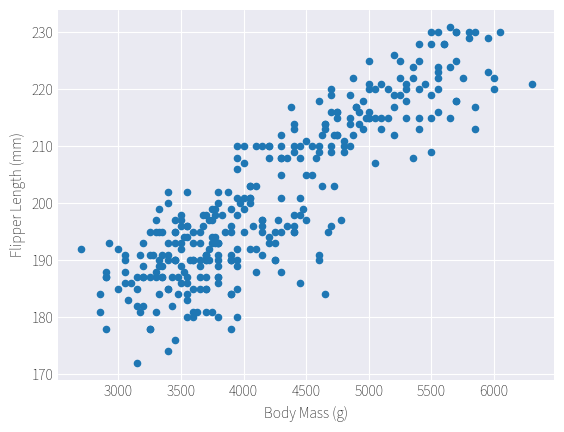

In [73]:
df.plot(kind='scatter', x='Body Mass (g)', y='Flipper Length (mm)') # 透過 plot 繪製散佈圖

array([[<Axes: title={'center': 'Body Mass (g)'}>]], dtype=object)

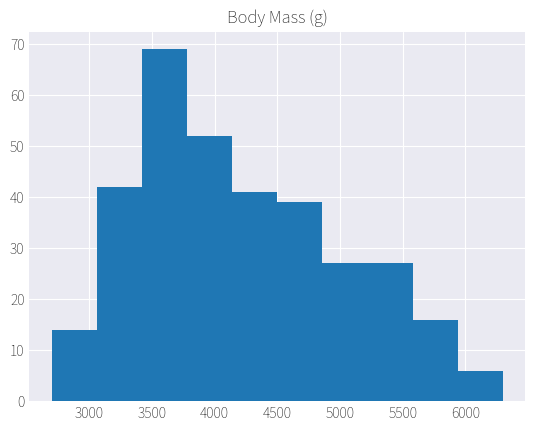

In [74]:
df.hist('Body Mass (g)') # 透過 hist 繪製直方圖

實際上，這些內建於資料表內的方法都是利用 `matplotlib` 這個套件達成的。因此我們也可以直接利用 `matplotlib` 繪製圖表，並加入更多客製化選項。

Text(0.5, 1.0, '體重與鰭長的散佈圖')

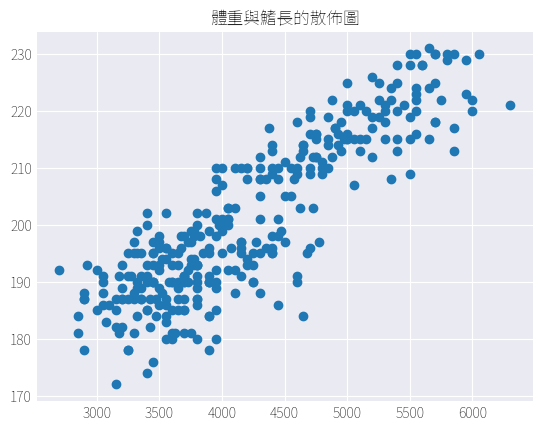

In [75]:
plt.scatter(df['Body Mass (g)'], df['Flipper Length (mm)']) # 透過 plt.scatter 繪製散佈圖
plt.title('體重與鰭長的散佈圖')

Text(0.5, 1.0, '體重的直方圖')

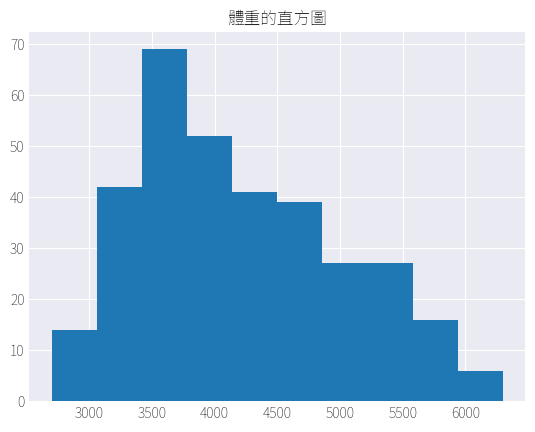

In [76]:
plt.hist(df['Body Mass (g)']) # 透過 plt.hist 繪製直方圖
plt.title('體重的直方圖')

`seaborn` 是另一個在 Python 上常用的視覺化套件。它包含各種統計常用的視覺化工具，並以簡單的語法繪製出精細的圖表，因此廣受好評。

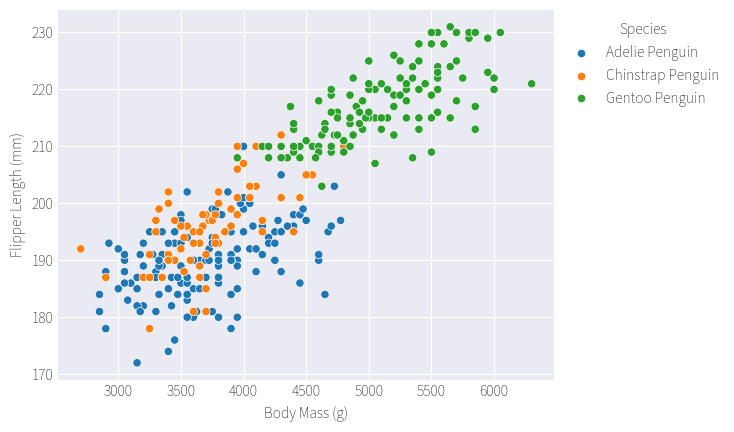

In [77]:
ax = sns.scatterplot(data=df, x='Body Mass (g)', y='Flipper Length (mm)', hue='Species') # 透過 seaborn 的 scatterplot 繪製散佈圖，並根據企鵝種類著色
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) # 移動圖例至圖表外

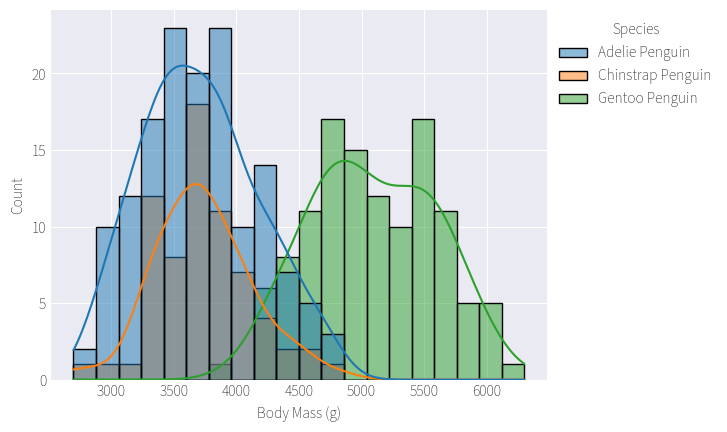

In [78]:
# 透過 seaborn 的 histplot 繪製直方圖，並根據企鵝種類著色，kde=True 代表顯示核密度估計，bins=20 代表分成 20 組
ax = sns.histplot(data=df, x='Body Mass (g)', hue='Species', kde=True, bins=20)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) # 移動圖例至圖表外

([0, 1, 2],
 [Text(0, 0, 'Adelie Penguin'),
  Text(1, 0, 'Chinstrap Penguin'),
  Text(2, 0, 'Gentoo Penguin')])

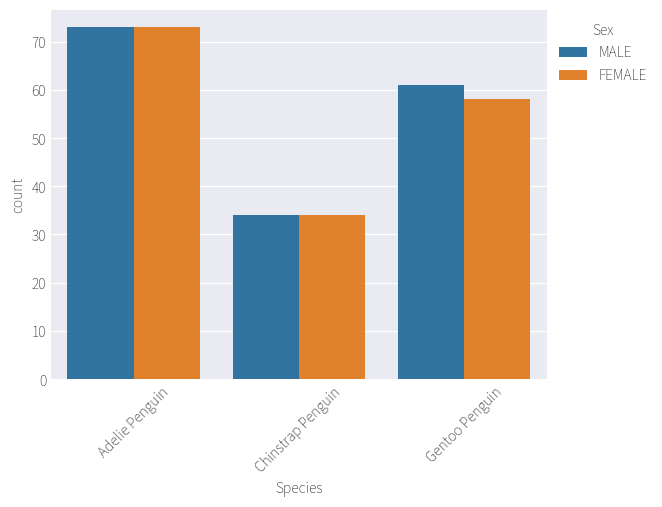

In [79]:
# 透過 seaborn 的 countplot 繪製企鵝種類計數圖，並根據性別著色
ax = sns.countplot(data=df, x='Species', hue='Sex')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) # 移動圖例至圖表外
plt.xticks(rotation=45) # 旋轉 x 軸標籤

([0, 1, 2],
 [Text(0, 0, 'Adelie Penguin'),
  Text(1, 0, 'Chinstrap Penguin'),
  Text(2, 0, 'Gentoo Penguin')])

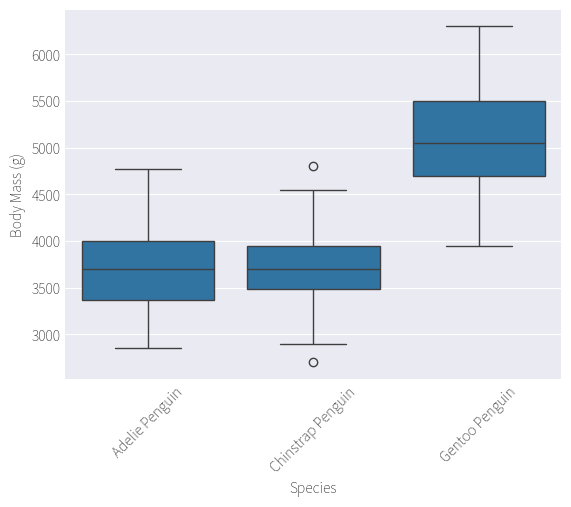

In [80]:
# 透過 seaborn 的 boxplot 繪製箱形圖，x 軸為企鵝種類，y 軸為體重
ax = sns.boxplot(data=df, x='Species', y='Body Mass (g)')
plt.xticks(rotation=45) # 旋轉 x 軸標籤

# 9. 資料匯出

當資料處理完成後，我們可以將其匯出，供其他人使用。

In [81]:
# df.to_csv('final_penguins.csv', index=False) # 將資料輸出成 CSV 檔，並且不輸出索引

In [82]:
# df.to_excel('final_penguins.xlsx', index=False) # 將資料輸出成 Excel 檔，並且不輸出索引

# 小試身手 2